In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,6)

import seaborn as sns; sns.set()
from fbprophet import Prophet

In [2]:
df1 = pd.read_csv("/Users/shuoli/Desktop/cs 677/Final_Project/data set/BlockChain.csv",index_col='Date', parse_dates=True)
df1.head()

,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,Hash_Rate,...,USD/JPY,USD/CHF,USD/KRW,USD/GBP,EUR/KRW,USD/CNY,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,90.73,1.06,1269.75,0.69,1774.86,6.83,0,0.0,0.08,0.15
2009-01-05,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,92.08,1.08,1326.15,0.69,1843.95,6.82,0,0.0,0.11,0.15
2009-01-07,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,93.79,1.12,1305.55,0.67,1763.60,6.84,0,0.0,0.11,0.47
2009-01-09,0.0,0.0,750.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56
2009-01-11,0.0,0.0,7600.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56


In [3]:
df1["Close"].isnull().any()

False

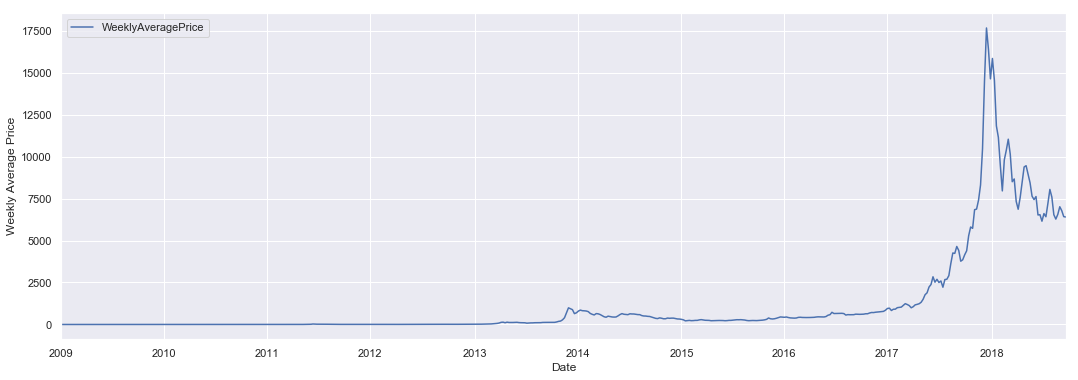

In [4]:
weekly_mean_price = pd.DataFrame(df1["Close"].resample("W").mean())
weekly_mean_price.columns = ["WeeklyAveragePrice"]
fig, ax = plt.subplots(figsize=(18,6))
weekly_mean_price.plot(ax=ax)
plt.ylabel('Weekly Average Price');

In [5]:
from statsmodels.tsa import stattools as stt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
decompfreq = 48  # 48 weeks seasonality
model = 'additive'

decomposition = seasonal_decompose(weekly_mean_price.WeeklyAveragePrice.interpolate("linear"), 
                                   freq=decompfreq, model=model)
df_decomposed = pd.DataFrame({'trend': decomposition.trend,
                              'seasonal' : decomposition.seasonal,
                              'residual' : decomposition.resid})
df_decomposed


,trend,seasonal,residual
Date,,,
2009-01-04,NaN,-138.018742,NaN
2009-01-11,NaN,-131.926168,NaN
2009-01-18,NaN,-269.305702,NaN
2009-01-25,NaN,-302.598452,NaN
2009-02-01,NaN,-82.475194,NaN
2009-02-08,NaN,-74.196514,NaN
2009-02-15,NaN,-62.880825,NaN
2009-02-22,NaN,-62.088225,NaN
2009-03-01,NaN,-33.009862,NaN


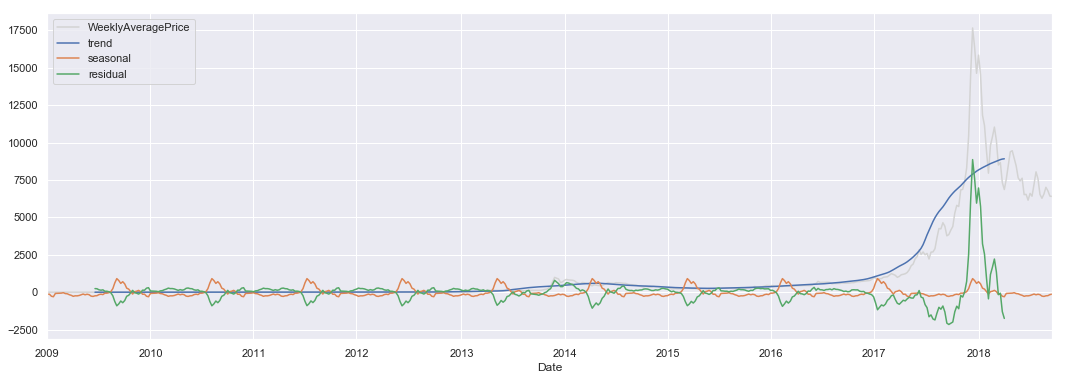

In [7]:
fig, ax = plt.subplots(figsize=(18,6))

weekly_mean_price.plot(ax=ax, label="observed", c='lightgrey')

df_decomposed.plot(ax=ax)

plt.legend(loc='upper left')

In [8]:
weekly_mean_price.columns = ["y"]
weekly_mean_price.index.names = ["ds"]
df=weekly_mean_price.reset_index()
df.tail()

,ds,y
503,2018-08-26,6556.677500
504,2018-09-02,7011.216667
505,2018-09-09,6776.312500
506,2018-09-16,6421.720000
507,2018-09-23,6400.600000


In [9]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(df);

/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = m.make_future_dataframe(periods=52,freq="W")
future.tail()

,ds
555,2019-08-25
556,2019-09-01
557,2019-09-08
558,2019-09-15
559,2019-09-22


In [11]:
forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
555,2019-08-25,13608.661765,11660.477823,15095.580497,13381.329167,13837.710728,-325.727347,-325.727347,-325.727347,-325.727347,-325.727347,-325.727347,0.0,0.0,0.0,13282.934418
556,2019-09-01,13691.492816,11814.925215,14983.365050,13459.556184,13930.676180,-336.336836,-336.336836,-336.336836,-336.336836,-336.336836,-336.336836,0.0,0.0,0.0,13355.155980
557,2019-09-08,13774.323867,11602.577629,14892.505721,13535.591568,14020.158591,-406.588404,-406.588404,-406.588404,-406.588404,-406.588404,-406.588404,0.0,0.0,0.0,13367.735463
558,2019-09-15,13857.154918,11651.283028,15054.578969,13609.033625,14110.761368,-463.126618,-463.126618,-463.126618,-463.126618,-463.126618,-463.126618,0.0,0.0,0.0,13394.028299
559,2019-09-22,13939.985968,11961.990116,15199.472757,13684.137848,14204.332450,-432.722992,-432.722992,-432.722992,-432.722992,-432.722992,-432.722992,0.0,0.0,0.0,13507.262976


In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
555,2019-08-25,13282.934418,11660.477823,15095.580497
556,2019-09-01,13355.155980,11814.925215,14983.365050
557,2019-09-08,13367.735463,11602.577629,14892.505721
558,2019-09-15,13394.028299,11651.283028,15054.578969
559,2019-09-22,13507.262976,11961.990116,15199.472757


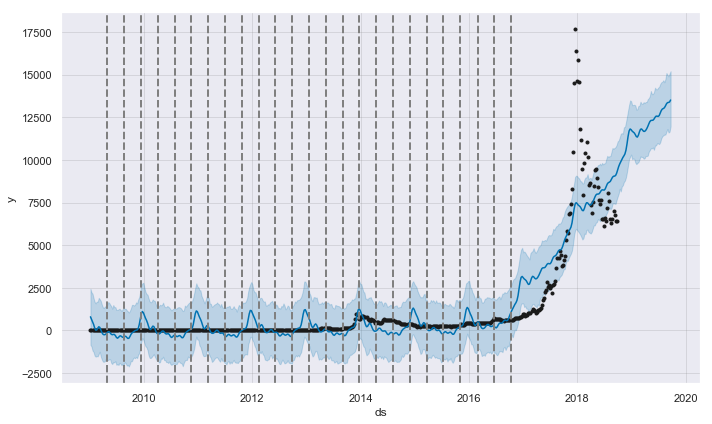

In [14]:
fig1 = m.plot(forecast)

for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

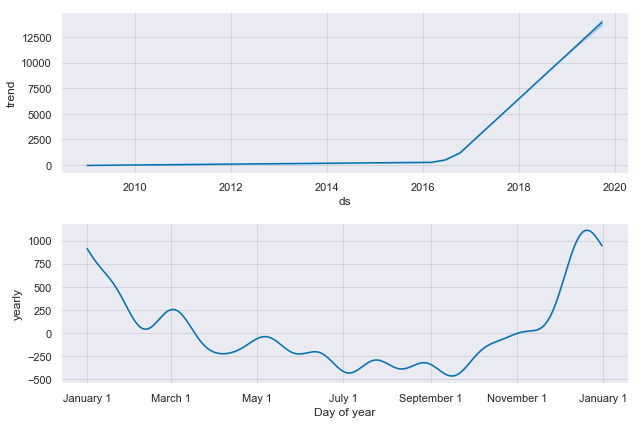

In [15]:
m.plot_components(forecast);